In [1]:
# Setting up the Colab environment. DO NOT EDIT!
import os
import warnings
warnings.filterwarnings("ignore")

try:
    import otter

except ImportError:
    ! pip install -q otter-grader==4.0.0
    import otter

if not os.path.exists('lab-tests'):
    zip_files = [f for f in os.listdir() if f.endswith('.zip')]
    assert len(zip_files)>0, 'Could not find any zip files!'
    assert len(zip_files)==1, 'Found multiple zip files!'
    ! unzip {zip_files[0]}

grader = otter.Notebook(colab=True,
                        tests_dir = 'lab-tests')

# Lab

## Learning Objectives
At the end of this learning activity you will be able to:
 - Practice creating statistical figures to answer biological questions.
 - Practice writing figure legends for statistical figures.
 - Practice writing descriptive reasonings about a figure.

**Note**: It is difficult to automatically grade figures as they are many "correct" answers.
So, most questions will accept _any_ figure or axis and then ask you to answer a question that should be obvious from a properly generated figure.
For all questions, assume a 95% interval.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
cell_level_data = pd.read_csv('pHrodo_DMEM.csv')
cell_level_data.head()

,Well,Field,Cell_Number,Top,Left,XCentroid,YCentroid,ObjectAreaCh1,ObjectTotalIntenCh1,ObjectAvgIntenCh1,ObjectVarIntenCh1,SpotCountCh2,SpotTotalAreaCh2,SpotAvgAreaCh2,SpotTotalIntenCh2,SpotAvgIntenCh2,TotalIntenCh2,AvgIntenCh2
0,B2,1,1,127,634,703.418228,197.382766,14889,40514018,2721.070455,1428.303950,5,122,24.400000,113038,926.540984,1151084,77.311035
1,B2,1,2,203,53,119.211656,272.750579,14670,36697977,2501.566258,1270.956156,0,0,0.000000,0,0.000000,531102,36.203272
2,B2,1,3,477,595,664.088627,538.774772,14341,38322709,2672.248030,1543.100214,16,382,23.875000,823276,2155.172775,3011914,210.021198
3,B2,1,4,488,302,389.107857,581.589321,25302,59364634,2346.242748,939.256416,21,324,15.428571,259496,800.913580,1265323,50.008814
4,B2,1,5,713,717,808.196306,790.656465,22414,57729816,2575.614170,1724.895666,0,0,0.000000,0,0.000000,590502,26.345231


## How full is each cell?

The strategy of using the number of beads in a cell as our count is that it is impacted by the size of the cell.
Small cells can only eat a few beads, large cells can eat many.
To address this we'll create a new measurement, the fraction of the cell containing beads.
This way, small cells that are 'stuffed' with beads will beat out large cells with only a few beads.

For this analysis we'll use:
 - `ObjectAreaCh1` - The area of the entire cell.
 - `SpotTotalAreaCh2` - The area of the cell containing beads.

### Q1: Create an `fraction_area_covered` column

Checked variables:
 * `cell_level_data['fraction_area_covered']` - The fraction of the area of each cell covered by pH responsive beads
 * `q1_plot` - A barplot showing the mean area of each cell covered split by well.

|               |    |
| --------------|----|
| Points        | 5  |
| Public Checks | 2  |
| Hidden Tests  | 1  |

_Points:_ 5

In [4]:
# What fraction of the cell's area is covered by phrodo beads

# BEGIN SOLUTION NO PROMPT
cell_area = cell_level_data['ObjectAreaCh1']
phrodo_area = cell_level_data['SpotTotalAreaCh2']

cell_level_data['fraction_area_covered'] = phrodo_area/cell_area
# END SOLUTION
""" # BEGIN PROMPT
cell_level_data['fraction_area_covered'] = ...

"""; # END PROMPT

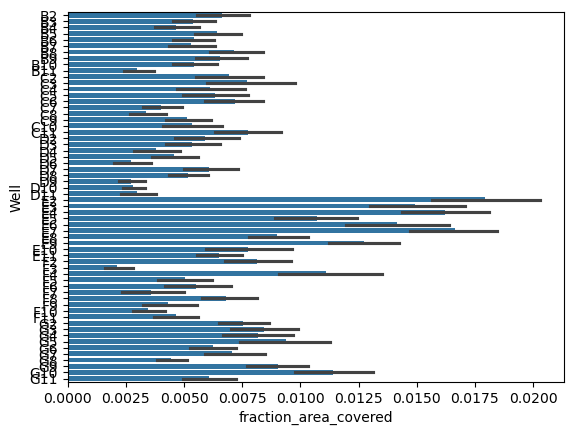

In [5]:
# Create a barplot of the fraction_area_covered in each well
# Your answers should be between 0 and 1.

# BEGIN SOLUTION NO PROMPT
q1_plot = sns.barplot(data = cell_level_data,
                      y = 'Well',
                      x = 'fraction_area_covered')

# END SOLUTION
""" # BEGIN PROMPT
q1_plot = ...

"""; # END PROMPT

In [ ]:
grader.check("q1_area_covered")

### Q2: Merge well_level_data with plate-map and visualize

Checked variables:
 * `plate_map` - Reading the plate_map.csv file.
 * `well_level_data` - A `pd.DataFrame` where each well is an index (row) and has 3 columns, `mean`, `sem`, and `count` calculated from the `fraction_area_covered` of the cells in the well.
 * `sample_level_data` - A `pd.DataFrame` that is the merging of the `plate_map` and `well_level_data`.
 * `q2a` - Which experimental condition (pHrodo_conc_ug) had less noise in the measurement?
 * `q2b`-  Does this graph show evidence that dopamine increases the percentage of the cell that contains beads?
 * `q2_plot` - Any plot that justifies your answers for `q2a` and `q2b`.

|               |    |
| --------------|----|
| Points        | 5  |
| Public Checks | 2  |
| Hidden Tests  | 1  |

_Points:_ 5

In [10]:
# Load in plate map
plate_map = pd.read_csv('plate_map.csv') # SOLUTION

In [11]:
# Group the cell level data by well and for each well calculate the mean, standard-error of the mean, and the number of cells

well_level_data = cell_level_data.groupby('Well')['fraction_area_covered'].agg(['mean', 'sem', 'count'])  # SOLUTION
well_level_data.head()

,mean,sem,count
Well,,,
B10,0.005435,0.000493,612
B11,0.002978,0.000312,739
B2,0.006614,0.000571,609
B3,0.005370,0.000448,720
B4,0.004660,0.000480,521


In [12]:
# Merge well_level_data with the platemap

sample_level_data = pd.merge(plate_map, well_level_data, left_on = 'well', right_index = True) # SOLUTION
sample_level_data.head()

,well,pHrodo_conc_ug,DA_Tx,replicate,mean,sem,count
0,B2,5.0,veh,Rep1,0.006614,0.000571,609
1,C2,5.0,veh,Rep2,0.006916,0.000747,373
2,D2,5.0,veh,Rep3,0.005893,0.000683,398
3,B3,5.0,DA06,Rep1,0.005370,0.000448,720
4,C3,5.0,DA06,Rep2,0.007715,0.000918,257


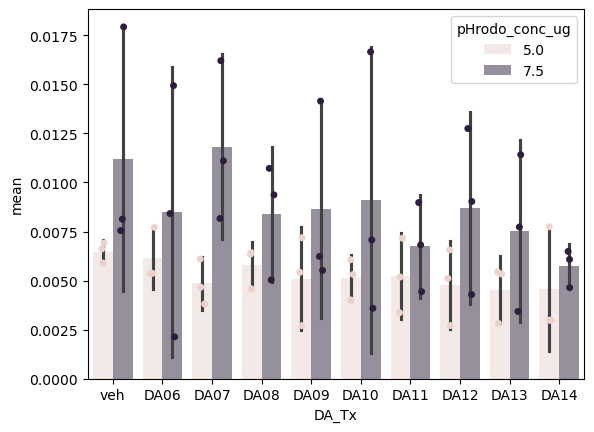

In [13]:
### Visualize merged dataset
# Create any visualization which answers the questions below.
# Feel free to explore other functions like `lineplot` & `pointplot`.

# BEGIN SOLUTION NO PROMPT
q2_plot = sns.barplot(data = sample_level_data,
            hue = 'pHrodo_conc_ug',
            x = 'DA_Tx',
            y = 'mean', errorbar=('se', 2), alpha=0.5)

sns.stripplot(data = sample_level_data,
            hue = 'pHrodo_conc_ug',
            x = 'DA_Tx',
            y = 'mean', dodge=True, legend=False, ax=q2_plot)
# END SOLUTION
""" # BEGIN PROMPT

q2_plot = ...

"""; # END PROMPT

In [14]:
# Which experimental condition (pHrodo_conc_ug) had less noise in the measurement?
# Answer 5.0 or 7.5
q2a = 5.0 # SOLUTION

# Write your reasoning in a Markdown cell after this.

In [15]:
# Does this graph show evidence that dopamine increases 
# the percentage of the cell that contains beads?
# Anwser 'yes' or 'no'
q2b = 'no' # SOLUTION

# Write your reasoning in a Markdown cell after this.

In [ ]:
grader.check("q2_merge")

This week we explored how to summarize large datasets by sample.
This aggregation is often important for downstream inferential tests like t-tests and ANOVAs.
However, this technique also looses a significant amount of information; ~525 numbers are compressed to a single value.
We will also explore more nuanced techniques like regression which allows us to use each of these points individually.

--------------------------------------------

## Submission

Check:
 - That all tables and graphs are rendered properly.
 - Code completes without errors by using `Restart & Run All`.
 - All checks **pass**.
 
Then save the notebook and the `File` -> `Download` -> `Download .ipynb`. Upload this file to BBLearn.